
# Código para executar regressão logística

# Declaração do problema

De acordo com a Organização Mundial da Saúde (OMS) o AVC é a 2ª causa de morte no mundo, responsável por aproximadamente 11% do total de mortes.
Esse conjunto de dados é usado para prever se um paciente provavelmente sofrerá AVC com base nos parâmetros de entrada, como sexo, idade, várias doenças e tabagismo. Cada linha nos dados fornece informações relevantes sobre o paciente.

Entradas: 
- Gênero 
- Idade
- Hipertensão
- Doença cardíaca
- Casado alguma vez
- Tipo de trabalho
- Tipo de residência
- Nível médio de glicose
- Índice de massa corporal
- Fumante

Saídas:
- AVC (1: teve AVC, 0: Não teve AVC)

# IMPORTANDO AS BIBLIOTECAS

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# IMPORTANDO O DATASET

In [2]:

dataset = pd.read_csv('stroke-data.csv')

# EXPLORANDO / VISUALIZANDO DADOS

In [3]:
dataset.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot: >

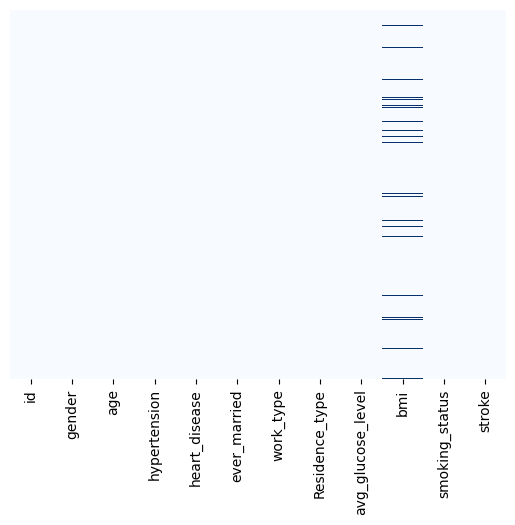

In [8]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

Text(0.5, 1.0, 'Alvo - Stroke')

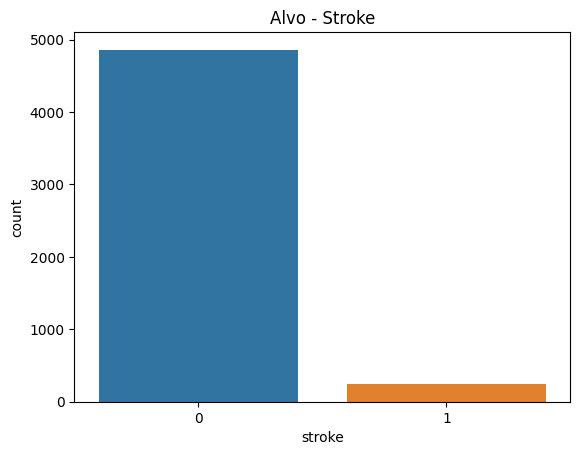

In [9]:
sns.countplot(x=dataset['stroke'])
plt.title('Alvo - Stroke')

In [10]:
stroke    = dataset[dataset['stroke']==1]
no_stroke = dataset[dataset['stroke']==0]


In [11]:
print("Total =", len(dataset))

print("Numero de pessoas que tiveram derrame =", len(stroke))
print("Porcentagem de pessoas que tiveram derrame =", 1.*len(stroke)/len(dataset)*100.0, "%")
 
print("Não tiveram derrame =", len(no_stroke))
print("Porcentagem de pessoas que não tiveram derrame =", 1.*len(no_stroke)/len(dataset)*100.0, "%")

Total = 5110
Numero de pessoas que tiveram derrame = 249
Porcentagem de pessoas que tiveram derrame = 4.87279843444227 %
Não tiveram derrame = 4861
Porcentagem de pessoas que não tiveram derrame = 95.12720156555773 %


In [12]:
from statistics import median
maleBmi = median(dataset.query('(gender == "Male")')['bmi'])
femaleBmi = median(dataset.query('(gender == "Female")')['bmi'])
print(f'mediana de bmi para genero masculino {maleBmi}')
print(f'mediana de bmi para genero feminino {femaleBmi}')

mediana de bmi para genero masculino 30.7
mediana de bmi para genero feminino 21.45


# PREPARANDO OS DADOS

In [13]:
def fill_bmi(data):
    bmi = data[0]
    gender = data[1]

    if pd.isnull(bmi):
        if gender == 'Male': 
            return maleBmi
        else:
            return femaleBmi
    else:
        return bmi
        

In [14]:
dataset['bmi'] = dataset[['bmi','gender']].apply(fill_bmi,axis=1)

<AxesSubplot: >

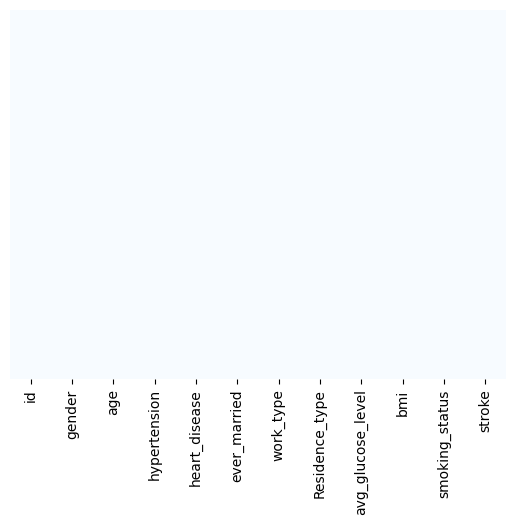

In [15]:
sns.heatmap(dataset.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [16]:
dataset.drop(['id'], axis=1, inplace=True)


In [17]:
ever_married = pd.get_dummies(dataset['ever_married'], drop_first = True)
residence_type = pd.get_dummies(dataset['Residence_type'], drop_first = True)
gender = pd.get_dummies(dataset['gender'], drop_first = True)
work_type = (dataset['work_type'].str.strip('[]')
                     .str.get_dummies(', ')
                     .rename(columns=lambda x: x.strip('"')))
smoking_status = (dataset['smoking_status'].str.strip('[]')
                     .str.get_dummies(', ')
                     .rename(columns=lambda x: x.strip('"')))                     
dataset.drop(['ever_married', 'Residence_type', 'gender', 'work_type', 'smoking_status'], axis=1, inplace=True)

dataset = pd.concat([dataset, ever_married, residence_type, gender, work_type, smoking_status], axis=1)
dataset = dataset.rename(columns={'Yes':'ever_married', 'Urban': 'residence_type', 'Male':'gender'})

In [18]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   avg_glucose_level  5110 non-null   float64
 4   bmi                5110 non-null   float64
 5   stroke             5110 non-null   int64  
 6   ever_married       5110 non-null   uint8  
 7   residence_type     5110 non-null   uint8  
 8   gender             5110 non-null   uint8  
 9   Other              5110 non-null   uint8  
 10  Govt_job           5110 non-null   int64  
 11  Never_worked       5110 non-null   int64  
 12  Private            5110 non-null   int64  
 13  Self-employed      5110 non-null   int64  
 14  children           5110 non-null   int64  
 15  Unknown            5110 non-null   int64  
 16  formerly smoked    5110 

<AxesSubplot: >

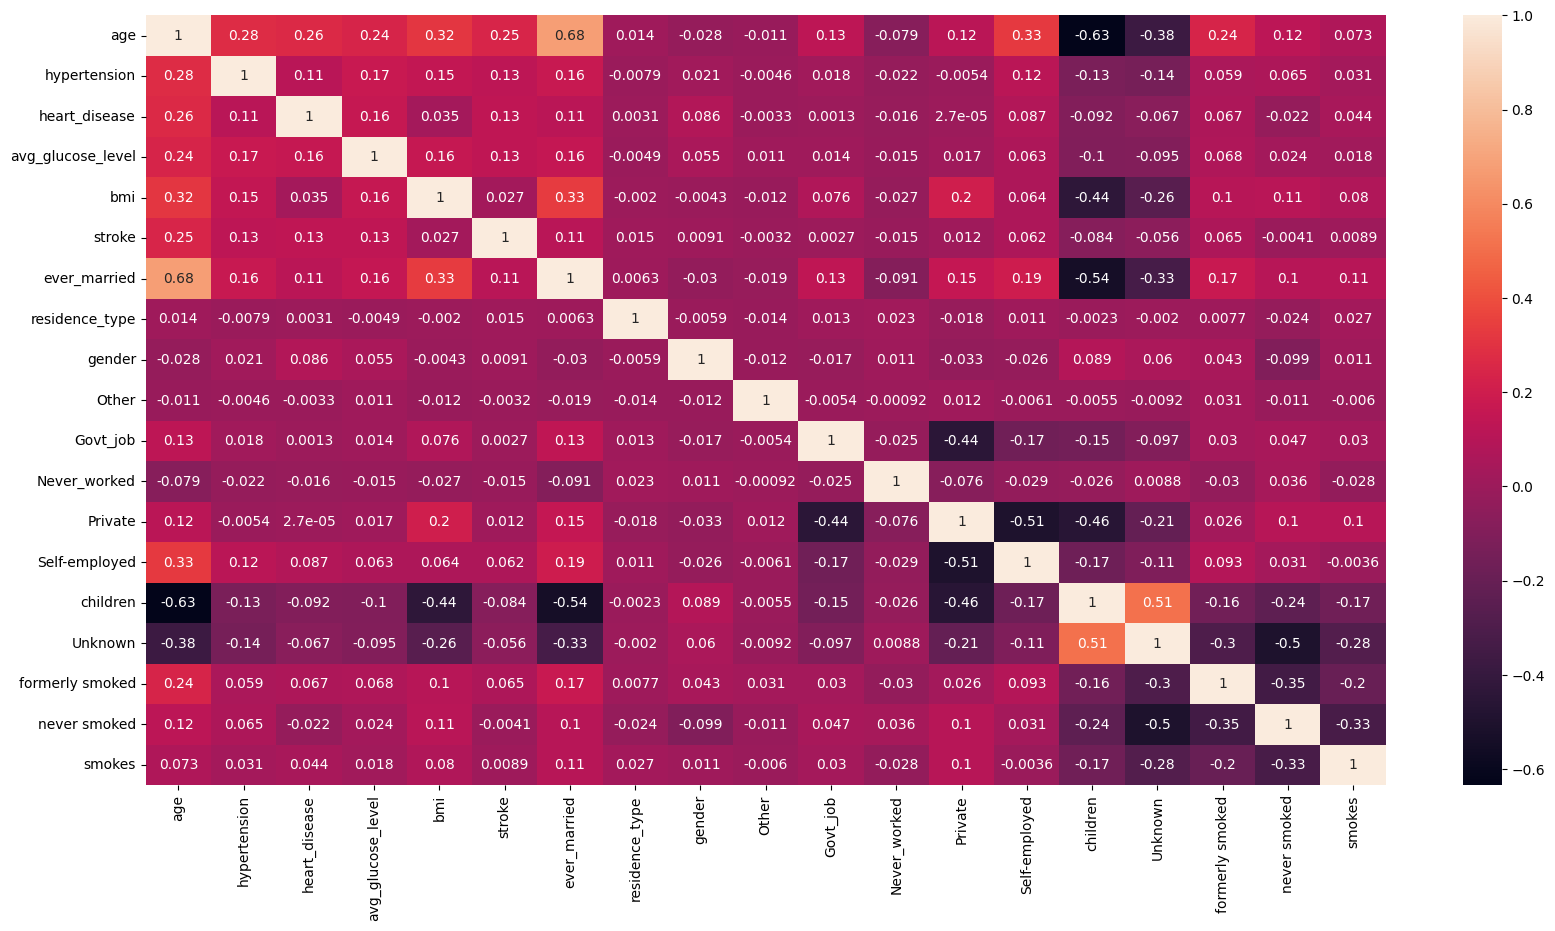

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot= True)

In [20]:
dataset.drop(['children', 'Unknown', 'Never_worked', 'ever_married', 'Other'],axis=1, inplace=True)

In [21]:
X = dataset.drop('stroke',axis=1).values
y = dataset['stroke'].values

In [22]:
# Aplicar técnica de subamostragem com RandomUnderSampler

from imblearn.under_sampling import RandomUnderSampler

oversample = RandomUnderSampler()
X,y=oversample.fit_resample(X,y)

<AxesSubplot: ylabel='count'>

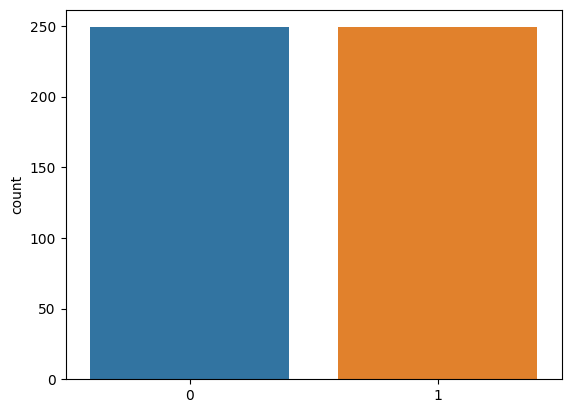

In [23]:
sns.countplot(x=y)

# TREINAMENTO DO MODELO

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)
X_test

array([[ 1.64,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [58.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [80.  ,  1.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [81.  ,  1.  ,  0.  , ...,  0.  ,  1.  ,  0.  ],
       [60.  ,  1.  ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [26]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       348 non-null    float64
 1   1       348 non-null    float64
 2   2       348 non-null    float64
 3   3       348 non-null    float64
 4   4       348 non-null    float64
 5   5       348 non-null    float64
 6   6       348 non-null    float64
 7   7       348 non-null    float64
 8   8       348 non-null    float64
 9   9       348 non-null    float64
 10  10      348 non-null    float64
 11  11      348 non-null    float64
 12  12      348 non-null    float64
dtypes: float64(13)
memory usage: 35.5 KB


In [27]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='liblinear')
classifier.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

# TESTANDO O MODELO

In [28]:
y_predict_test = classifier.predict(X_test)

In [29]:
classifier.score(X_test, y_test)

0.7266666666666667

# VISUALIZANDO OS DATASETS DE TESTE

<AxesSubplot: >

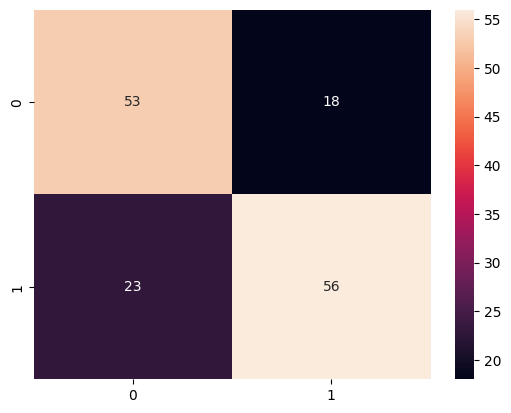

In [30]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72        71
           1       0.76      0.71      0.73        79

    accuracy                           0.73       150
   macro avg       0.73      0.73      0.73       150
weighted avg       0.73      0.73      0.73       150

